<a href="https://colab.research.google.com/github/AmbiTyga/73String/blob/main/73String.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scrapy -q

     |████████████████████████████████| 245kB 11.7MB/s 
     |████████████████████████████████| 61kB 6.1MB/s 
     |████████████████████████████████| 245kB 24.7MB/s 
     |████████████████████████████████| 3.1MB 21.7MB/s 
     |████████████████████████████████| 3.2MB 50.0MB/s 
     |████████████████████████████████| 3.2MB 59.1MB/s 
     |████████████████████████████████| 81kB 6.6MB/s 
     |████████████████████████████████| 61kB 6.3MB/s 


In [1]:
import pandas as pd
import re
import json, operator
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [2]:
train = pd.read_excel('/content/Training_Data.01 (1).xlsx')
data = train.copy()

In [5]:
data.head()

,Company Name,Business Description,Industry Classification Tag
0,"ADSOUTH PARTNERS, INC.","Adsouth Partners, Inc. provides advertising ag...",Advertising
1,"Artec Global Media, Inc.","Artec Global Media, Inc., formerly Artec Consu...",Advertising
2,Betawave Corp.,Betawave Corporation provides online marketing...,Advertising
3,BOSTON OMAHA Corp,Boston Omaha Corporation is engaged in the bus...,Advertising
4,Bright Mountain Media Inc,"Bright Mountain Media, Inc. is a digital media...",Advertising


In [6]:
data['Industry Classification Tag'].unique()

array(['Advertising', 'Aerospace & Defense', 'Apparel Retail',
       'Apparel, Accessories & Luxury Goods', 'Application Software',
       'Asset Management & Custody Banks', 'Auto Parts & Equipment',
       'Biotechnology', 'Building Products', 'Casinos & Gaming',
       'Commodity Chemicals', 'Communications Equipment',
       'Construction & Engineering',
       'Construction Machinery & Heavy Trucks', 'Consumer Finance',
       'Data Processing & Outsourced Services',
       'Diversified Metals & Mining', 'Diversified Support Services',
       'Electric Utilities', 'Electrical Components & Equipment',
       'Electronic Equipment & Instruments',
       'Environmental & Facilities Services', 'Gold',
       'Health Care Equipment', 'Health Care Facilities',
       'Health Care Services', 'Health Care Supplies',
       'Health Care Technology', 'Homebuilding',
       'Hotels, Resorts & Cruise Lines',
       'Human Resource & Employment Services', 'Industrial Machinery',
       'Integ

In [3]:
from w3lib.html import remove_tags
import requests
from scrapy.selector import Selector

def inc_info(keywords):
  '''
  The function googles the keywords, and returns the details from Knowledge Graph panel of Google. 
  '''
  keywords = keywords.replace(" ",'+')
  url = f'https://www.google.com/search?&q={keywords}'

  req = requests.get(url,
                   headers= {'User-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.150 Safari/537.36'})
  details_with_tags = Selector(text = req.text).css('span.hgKElc').get()

  if not details_with_tags:
    details_with_tags = Selector(text = req.text).css('div.kno-rdesc span').get()

  if details_with_tags:
    details = remove_tags(details_with_tags)
    return details

In [4]:
data['Business Description'].fillna(data[data['Business Description'].isna()]['Company Name'].apply(inc_info),inplace = True)

In [5]:
data.dropna(inplace = True)

In [6]:
pd.set_option('max_row',70)
pd.DataFrame(data['Industry Classification Tag'].value_counts())

,Industry Classification Tag
Regional Banks,569
Biotechnology,402
Gold,365
Oil & Gas Exploration & Production,224
Application Software,205
Pharmaceuticals,197
Health Care Equipment,156
Thrifts & Mortgage Finance,133
Research & Consulting Services,117
Advertising,113


# tARGETS

In [12]:
!wget http://nlp.stanford.edu/data/glove.840B.300d.zip

--2021-02-13 04:33:16--  http://nlp.stanford.edu/data/glove.840B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.840B.300d.zip [following]
--2021-02-13 04:33:16--  https://nlp.stanford.edu/data/glove.840B.300d.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip [following]
--2021-02-13 04:33:17--  http://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2176768927 (2.0G) [application/zip

In [7]:
#@title Load and Check Vocabulary of input
#@markdown - load_embed(filepath): returns embedding matrix
#@markdown - build_vocab(pd.Series): Returns a vocab from input
#@markdown - check_coverage(vocab, embedding_index): Compares text in dataset with text in embeddings 


## loads embedding vectors
def load_embed(file):
    def get_coefs(word,*arr): 
        return word, np.asarray(arr, dtype='float32')
    
    if file == '../input/embeddings/wiki-news-300d-1M/wiki-news-300d-1M.vec':
        embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(file) if len(o)>100)
    else:
        embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(file, encoding='latin'))
        
    return embeddings_index

def get_words(sentence):
  sentence = re.sub(r'(â€™s)',"'",sentence,flags = re.I)
  sentence = re.sub(r'Â',"",sentence,flags = re.I)
  sentence = re.sub(r'\%'," percent",sentence,flags = re.I)
  
  sentence = re.sub(r'-'," ",sentence,flags = re.I)
  sentence = re.sub('[,\.!?\'\:\(\);]','',sentence)
  sentence = re.sub('\s+'," ",sentence)
  return sentence.split()

# Build vocab from dataset
def build_vocab(texts):
    sentences = texts.apply(get_words).values
    vocab = {}
    for sentence in sentences:
        for word in sentence:
            try:
                vocab[word] += 1
            except KeyError:
                vocab[word] = 1
    return vocab

# Checks how many words present in embeddings wrt dataset
def check_coverage(vocab, embeddings_index):
    known_words = {}
    unknown_words = {}
    nb_known_words = 0
    nb_unknown_words = 0
    for word in vocab.keys():
        try:
            known_words[word] = embeddings_index[word]
            nb_known_words += vocab[word]
        except:
            unknown_words[word] = vocab[word]
            nb_unknown_words += vocab[word]
            pass

    print('Found embeddings for {:.3%} of vocab'.format(len(known_words) / len(vocab)))
    print('Found embeddings for  {:.3%} of all text'.format(nb_known_words / (nb_known_words + nb_unknown_words)))
    unknown_words = sorted(unknown_words.items(), key=operator.itemgetter(1))[::-1]

    return unknown_words

def ngrams_top(corpus,ngram_range,n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    """
    vec = CountVectorizer(stop_words = 'english',ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    total_list=words_freq[:n]
    df=pd.DataFrame(total_list,columns=['text','count'])
    return df

In [8]:
# !unzip /content/glove.840B.300d.zip
glove = load_embed("/content/glove.840B.300d.txt")

In [9]:
vocab = build_vocab(data['Business Description'])
oov_glove = check_coverage(vocab, glove)

Found embeddings for 83.501% of vocab
Found embeddings for  98.572% of all text


In [10]:
data['Company Name'] = data['Company Name'].apply(lambda x:" ".join(get_words(x)))
data['Business Description'] = data['Business Description'].apply(lambda x:" ".join(get_words(x)))

In [19]:
ngram2=ngrams_top(data['Business Description'],ngram_range=(2,2))

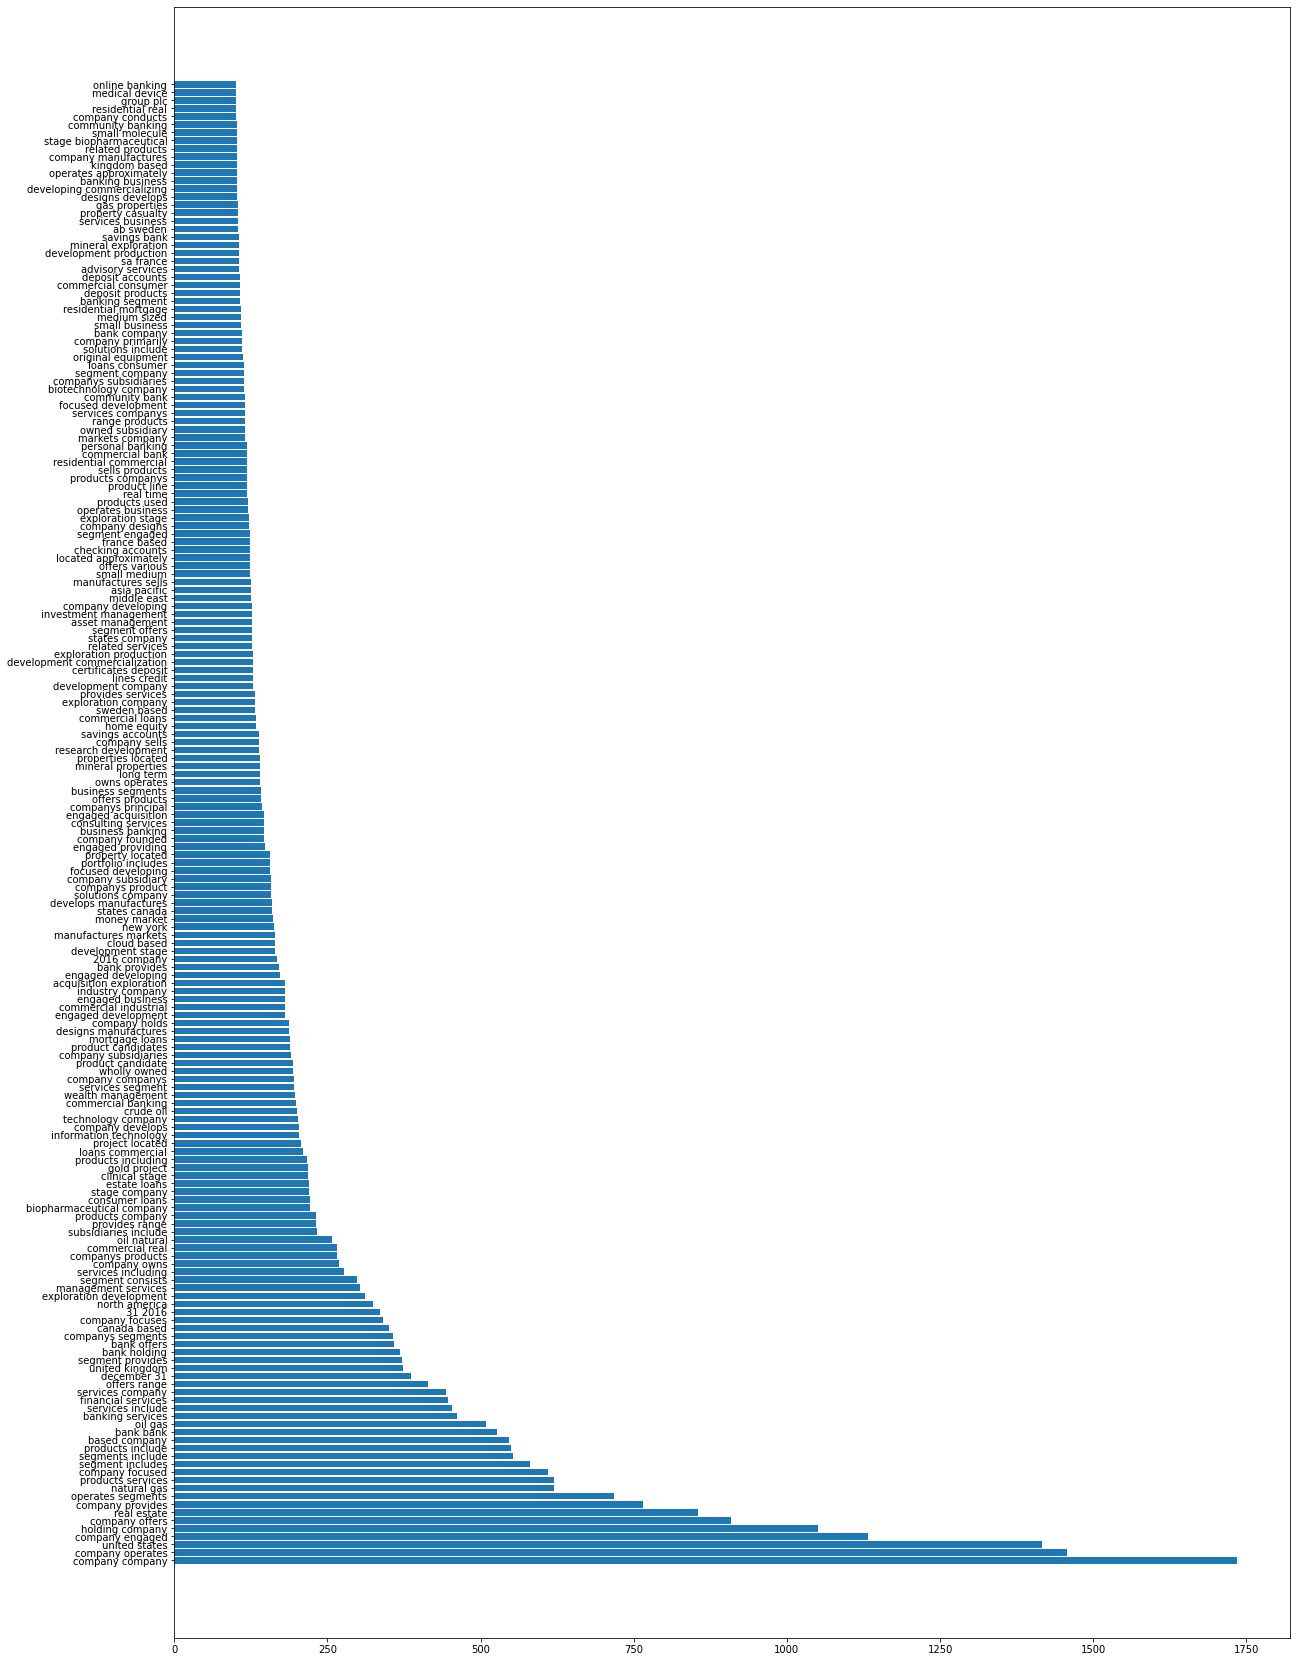

In [21]:
ngram2_100=ngram2.query('count>100')
plt.figure(figsize=(20,30))
plt.barh(ngram2_100['text'].values,ngram2_100['count'].values)
plt.show()

In [56]:
ngrams_top(data['Business Description'],ngram_range=(5,5))

,text,count
0,clinical stage biopharmaceutical company company,69
1,company engaged acquisition exploration develo...,61
2,company company engaged acquisition exploration,55
3,loans commercial real estate loans,50
4,stage biopharmaceutical company company focused,40
...,...,...
446793,exterior insulation finish eifs offerings,1
446794,insulation finish eifs offerings tools,1
446795,finish eifs offerings tools safety,1
446796,eifs offerings tools safety accessories,1


In [ ]:
ngram3.plot.barh(x='text',y='count')

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fcaee5cea60> (for post_execute):


KeyboardInterrupt: ignored